# t-SNE: t-Distributed Stochastic Neighbor Embedding

t-SNE = t-Distributed Stochastic Neighbor Embedding.

This is a dimensionality reduction technique, similar to PCA. This type of dimensionality reductions are essential to visualize high dimensional datasets.

From the original paper: "t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding". Van der Maaten & Hinton, 2008.

The method is computationally very heavy and sometimes impractical for large datasets. Some recomendations in this respect are:
- Reduce the datset taking random samples
- Apply PCA dimensionality reduction first to reduce th einput dimensions

For this notebook, I followed this Medium post by Luuk Derksen:

https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

I use the breast cancer dataset instead of the MNIST dataset, as in the post. However, it makes sense to use a dataset with a higher number of classes than 2...

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 3D plots with matplotlib
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [6]:
import sklearn
sklearn.__version__

'0.19.1'

In [7]:
from sklearn.datasets import load_breast_cancer

In [8]:
cancer = load_breast_cancer()

In [9]:
# Data frame of the data
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [10]:
# Target
y = cancer['target']

In [11]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [12]:
len(df.columns)

30

In [13]:
# First, we need to scale our data
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

### PCA n=3

In [15]:
# We need to select the number of components we want to get
pca = PCA(n_components=3)

In [17]:
# Fit
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
# Transform the data to the new base
x_pca = pca.transform(scaled_data)

In [19]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [ 0.44272026  0.18971182  0.09393163]


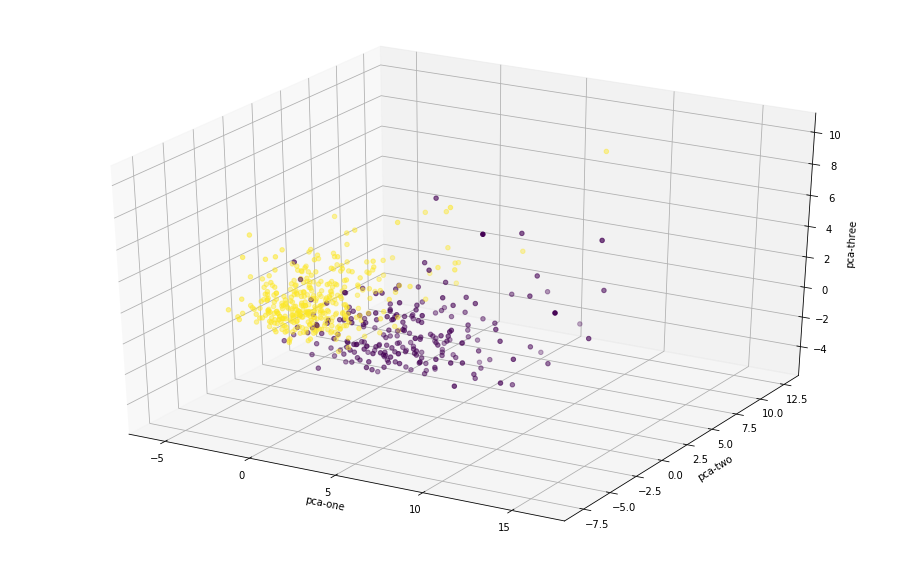

In [20]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=x_pca[:,0], 
    ys=x_pca[:,1], 
    zs=x_pca[:,2], 
    c=y
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

### PCA n=2

In [21]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [22]:
x_pca = pca.transform(scaled_data)

In [30]:
x_pca.shape

(569, 2)

Text(0,0.5,'Second Principal Component')

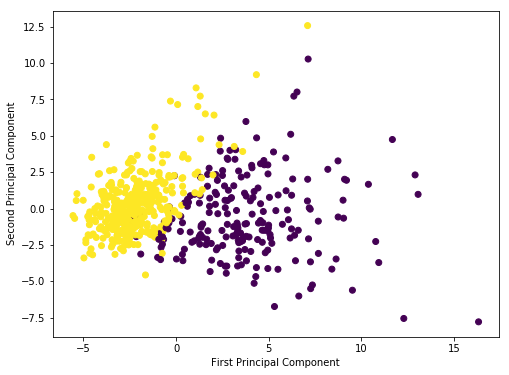

In [23]:
# Plot data points in new base coloring the class
# We see the groups are clearly separable!
# We could apply a classifier on x_pca now, much easier
# PCA can be understood as a compression algorithm: 30 features -> 2 features
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

### t-SNE n=2

In [24]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(scaled_data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.006s...
[t-SNE] Computed neighbors for 569 samples in 0.081s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.002853
[t-SNE] Error after 300 iterations: 0.923059


In [31]:
tsne_results.shape

(569, 2)

Text(0,0.5,'Second t-SNE Component')

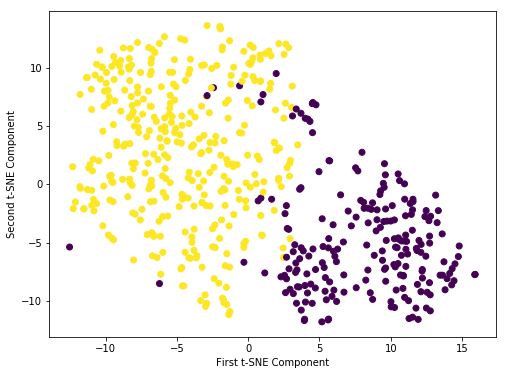

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(tsne_results[:,0],tsne_results[:,1],c=y)
plt.xlabel('First t-SNE Component')
plt.ylabel('Second t-SNE Component')